In [627]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette("Set2")

In [640]:
data1 = pd.read_excel(r'final_reduced.xlsx')
data1.set_index(['country', 'year'], inplace=True)
data1 = data1._get_numeric_data()
#data.drop(['sust.level.ghg', 'min.temp.pat', 'max.temp.pat', 'prec.pat', 'sust.level.clim',
#          'aqi.bucket', 'sust.level.aqi', 'land.dom', 'sust.level.land', 'hdi.level'], axis=1, inplace=True)
#data.drop(['sust.level.ghg','sust.level.clim', 'sust.level.aqi', 'sust.level.land'], axis=1, inplace=True)
data1 = data1.iloc[: , 1:]
data1.head()

co2.em  ch4.cap  n2o.cap  min.temp  min.prec      o3.exp  \
country     year                                                              
Afghanistan 1990  2582389    0.644    0.179      -4.2       2.9  121.690000   
            1991  2490067    0.619    0.175      -5.7       5.0  118.869069   
            1992  1717605    0.586    0.161      -4.7       4.7  117.283758   
            1993  1578188    0.555    0.151      -5.9       3.7  116.700414   
            1994  1284149    0.538    0.139      -5.0       7.2  116.885379   

                  pm2.5.exp    pm10.exp  country.land  forest.inland.perc  \
country     year                                                            
Afghanistan 1990  49.350000  180.804448      652860.0            1.850994   
            1991  47.864645  183.463499      652860.0            1.850994   
            1992  47.209527  179.054795      652860.0            1.850994   
            1993  47.221086  172.963715      652860.0            1.850994   
            1994  47.735764  164.997647      652860.0            1.850994   

                  urban.agricult.perc    hdi  
country     year                              
Afghanistan 1990            58.303160  0.302  
            1991            58.289670  0.307  
            1992            58.291497  0.316  
            1993            58.146280  0.312  
            1994            57.962769  0.307

In [629]:
from scipy.cluster.vq import kmeans2
from sklearn import preprocessing

In [639]:
a1=data1.groupby(['country'])['co2.em'].mean().reset_index(name='co2.em').set_index(['country'])
a2=data1.groupby(['country'])['ch4.cap'].mean().reset_index(name='ch4.cap').set_index(['country'])
a3=data1.groupby(['country'])['n2o.cap'].mean().reset_index(name='n2o.cap').set_index(['country'])
a4=data1.groupby(['country'])['min.temp'].mean().reset_index(name='min.temp').set_index(['country'])
a5=data1.groupby(['country'])['min.prec'].mean().reset_index(name='min.prec').set_index(['country'])
a6=data1.groupby(['country'])['o3.exp'].mean().reset_index(name='o3.exp').set_index(['country'])
a7=data1.groupby(['country'])['pm2.5.exp'].mean().reset_index(name='pm2.5.exp').set_index(['country'])
a8=data1.groupby(['country'])['pm10.exp'].mean().reset_index(name='pm10.exp').set_index(['country'])
a9=data1.groupby(['country'])['country.land'].mean().reset_index(name='country.land').set_index(['country'])
a10=data1.groupby(['country'])['forest.inland.perc'].mean().reset_index(name='forest.inland.perc').set_index(['country'])
a11=data1.groupby(['country'])['urban.agricult.perc'].mean().reset_index(name='urban.agricult.perc').set_index(['country'])
a12=data1.groupby(['country'])['hdi'].mean().reset_index(name='hdi').set_index(['country'])

a = pd.merge(a1,a2, on='country')
a = pd.merge(a,a3, on='country')
a = pd.merge(a,a4, on='country')
a = pd.merge(a,a5, on='country')
a = pd.merge(a,a6, on='country')
a = pd.merge(a,a7, on='country')
a = pd.merge(a,a8, on='country')
a = pd.merge(a,a9, on='country')
a = pd.merge(a,a10, on='country')
a = pd.merge(a,a11, on='country')
a = pd.merge(a,a12, on='country')
data = a.reset_index()
data.drop('country', axis=1, inplace=True)
data.head()

,co2.em,ch4.cap,n2o.cap,min.temp,min.prec,o3.exp,pm2.5.exp,pm10.exp,country.land,forest.inland.perc,urban.agricult.perc,hdi
0,3.424143e+06,0.545385,0.140692,-5.457692,4.165385,117.050578,50.895301,109.739004,652860.0,1.850994,58.079070,0.394808
1,1.821421e+07,2.240000,0.183692,10.250000,0.400000,98.535113,28.695957,176.793795,1246700.0,60.540271,39.906585,0.316615
2,1.595819e+08,3.382308,1.090423,1.542308,16.796154,72.874444,14.606349,131.921488,2780400.0,13.209831,49.044462,0.785346
3,3.601685e+08,8.657692,2.298077,8.161538,14.030769,62.388170,7.162813,34.051455,7741220.0,17.779767,55.098667,0.905923
4,7.076905e+07,1.380769,0.535769,-6.369231,27.515385,101.890715,17.478589,66.210716,83879.0,47.304934,36.804556,0.859577


C:\Users\Huawei\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Inertia of Cosine k-Means \n versus number of clusters \n (case 1)')

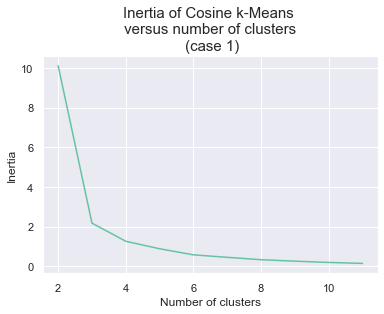

In [631]:
scaled = preprocessing.normalize(data1)
scores = [KMeans(n_clusters=i+2).fit(scaled).inertia_ for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means \n versus number of clusters \n (case 1)", size=15)

In [632]:
from numpy import random 
random.seed(15)

centroid, label = kmeans2(data1, 3, minit='points')
centroid = pd.DataFrame(centroid).T
centroid

,0,1,2
0,6.426815e+09,1.589117e+09,1.569914e+08
1,1.764375e+00,1.266062e+00,2.139935e+00
2,7.726000e-01,3.414433e-01,5.313462e-01
3,-9.965000e+00,-8.157732e+00,6.702366e+00
4,3.204750e+01,2.642990e+01,2.623471e+01
5,1.072400e+02,1.006580e+02,8.661090e+01
6,2.608983e+01,3.120758e+01,2.689327e+01
7,6.683008e+01,9.870682e+01,1.042529e+02
8,9.659981e+06,6.222195e+06,1.131476e+06
9,3.188797e+01,4.538288e+01,3.104305e+01


In [633]:
counts = np.bincount(label)
counts = pd.DataFrame(counts).T
counts

,0,1,2
0,40,97,1141


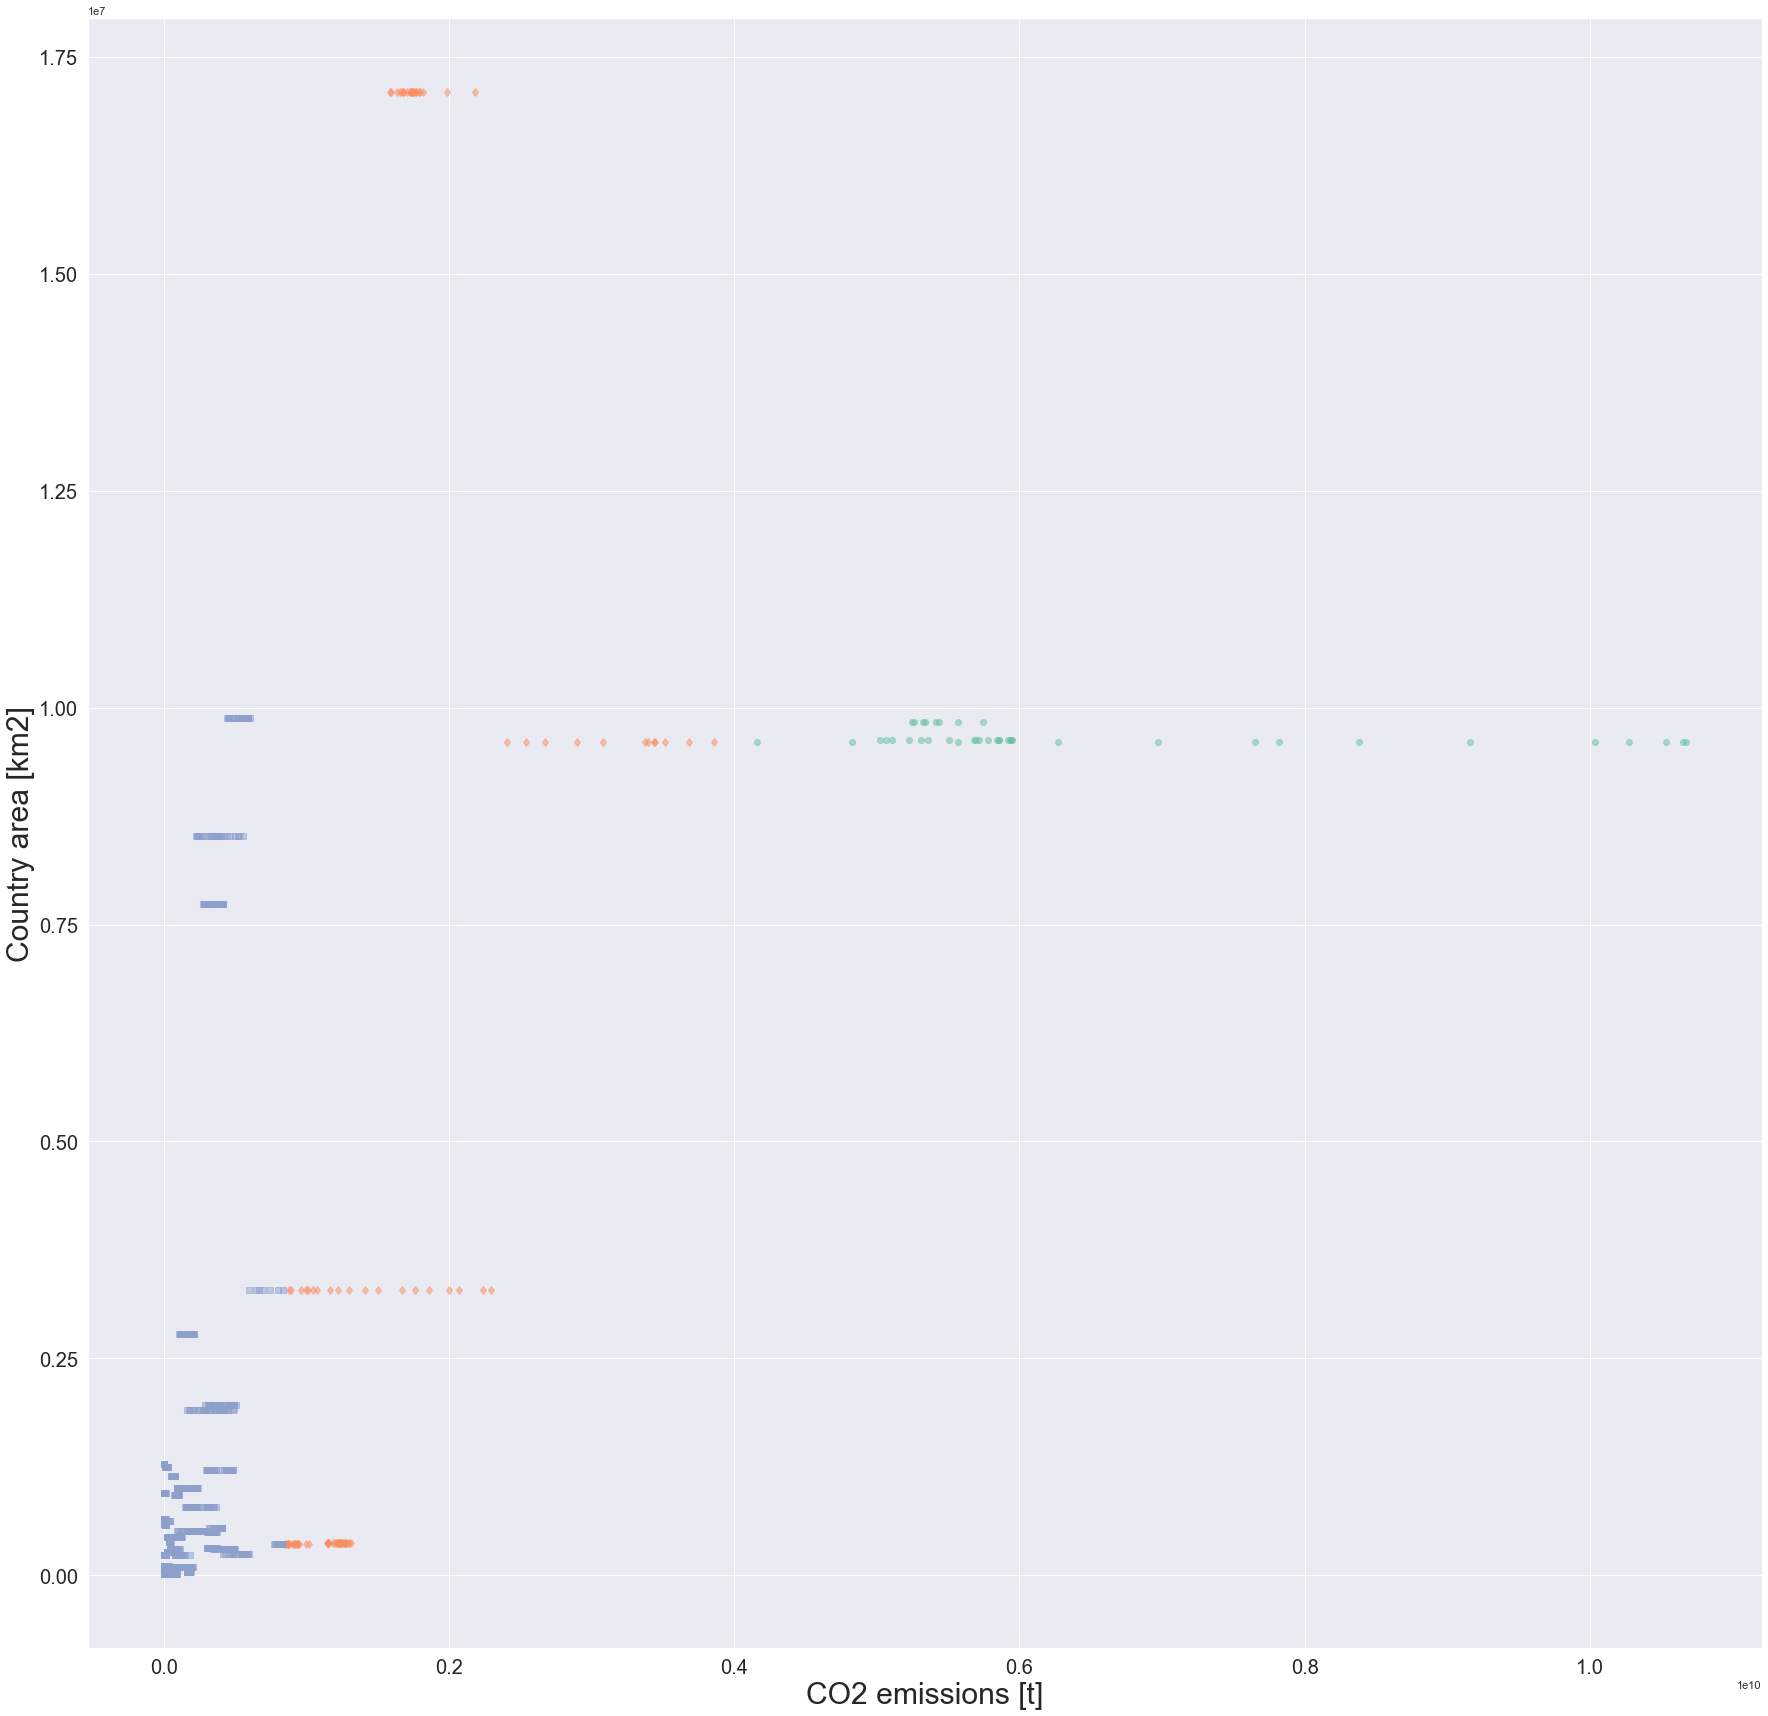

In [634]:
from contextlib import suppress

with suppress(Exception):
    w0 = data1[label == 0]
    w1 = data1[label == 1]
    w2 = data1[label == 2]

    plt.subplots(figsize=(30,30))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.plot(w0.iloc[:, 0], w0.iloc[:, 8], 'o', alpha=0.5, label='Class 1')
    plt.plot(w1.iloc[:, 0], w1.iloc[:, 8], 'd', alpha=0.5, label='Class 2')
    plt.plot(w2.iloc[:, 0], w2.iloc[:, 8], 's', alpha=0.5, label='Class 3')

    plt.xlabel('CO2 emissions [t]', size=30)
    plt.ylabel('Country area [km2]', size=30)

    plt.plot(centroid[:, 0], centroid[:, 1], 'k*', label='centroids')
    plt.axis('equal')

    plt.legend(label)
    plt.show()

C:\Users\Huawei\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Inertia of Cosine k-Means \n versus number of clusters \n (case 2)')

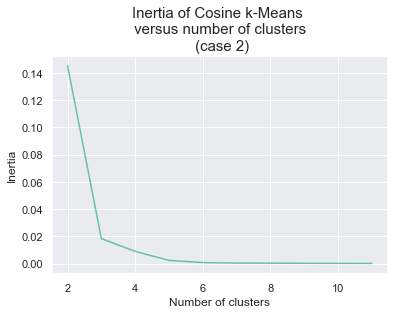

In [635]:
scaled = preprocessing.normalize(data)
scores = [KMeans(n_clusters=i+2).fit(scaled).inertia_ for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means \n versus number of clusters \n (case 2)", size=15)

In [636]:
from numpy import random 
random.seed(15)

centroid, label = kmeans2(data, 3, minit='points')
centroid = pd.DataFrame(centroid).T
centroid

,0,1,2
0,1.272965e+09,5.680212e+09,1.462387e+08
1,1.272080e+00,1.572308e+00,2.139022e+00
2,3.549391e-01,6.537692e-01,5.319674e-01
3,-6.267869e+00,-1.063846e+01,6.568055e+00
4,2.632869e+01,2.698462e+01,2.642831e+01
5,9.960986e+01,1.066404e+02,8.665516e+01
6,2.963781e+01,3.156863e+01,2.671258e+01
7,8.537589e+01,1.093062e+02,1.025597e+02
8,5.280117e+06,9.646139e+06,1.106326e+06
9,4.636482e+01,2.899136e+01,3.145519e+01


In [637]:
counts = np.bincount(label)
counts = pd.DataFrame(counts).T
counts

,0,1,2
0,4,2,44


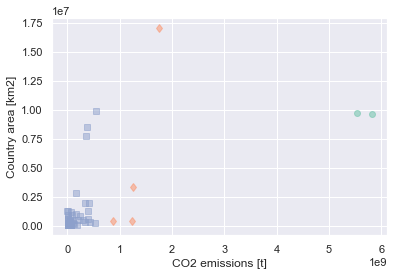

In [642]:
from contextlib import suppress

with suppress(Exception):
    
    w0 = data[label == 0]
    w1 = data[label == 1]
    w2 = data[label == 2]

    plt.plot(w1.iloc[:, 0], w1.iloc[:, 8], 'o', alpha=0.5, label='Class 1')
    plt.plot(w0.iloc[:, 0], w0.iloc[:, 8], 'd', alpha=0.5, label='Class 2')
    plt.plot(w2.iloc[:, 0], w2.iloc[:, 8], 's', alpha=0.5, label='Class 3')
    plt.xlabel('CO2 emissions [t]')
    plt.ylabel('Country area [km2]')
    plt.plot(centroid[:, 0], centroid[:, 1], 'k*', label='centroids')
    plt.axis('equal')

    plt.legend(label)
    plt.show()

    for idx, row in df.iterrows():
        ax.annotate(row['Player'], (row['Age'], row['Pos']) )
    # force matplotlib to draw the graph
    plt.show()